## Function read data

In [190]:
import pandas as pd

def read_data(sheet_names):
    df = []
    for name in sheet_names:
        cur_df = pd.read_excel("./Du lieu mo hinh.xlsx", sheet_name=name)

        df.append(cur_df)
    return pd.concat(df, axis=0)

In [191]:
df = read_data(["Construction"])
name = "Construction"
print(len(df))
df.head(10)


448


,Industry,Company,Year,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,GDP,Inflation
0,4.0,AME,2012,136.668058,40.80,0.370,0.129,0.651821,0.024745,5.758459,-2.21,0.046150,0.233462,1.24,0.0525,0.0910
1,NaN,AME,2013,118.161060,68.40,0.519,0.246,0.526819,0.047038,5.629343,7.79,-0.121128,0.304579,1.42,0.0542,0.0660
2,NaN,AME,2014,137.743282,46.80,0.352,0.128,0.635686,0.029067,5.898468,0.36,0.308818,0.319243,1.09,0.0598,0.0409
3,NaN,AME,2015,85.983852,48.00,0.358,0.126,0.648503,0.026650,5.944056,0.44,0.046644,0.403468,0.94,0.0668,0.0063
4,NaN,AME,2016,42.275827,46.80,0.343,0.105,0.695288,0.018437,6.103312,0.63,0.172637,0.238702,1.12,0.0621,0.0267
5,NaN,AME,2017,169.630840,51.60,0.348,0.097,0.720513,0.038682,6.274482,2.88,0.186693,0.160814,1.18,0.0681,0.0352
6,NaN,AME,2018,376.263756,188.40,1.128,0.278,0.753086,0.058566,6.517009,3.47,0.274465,0.142490,1.16,0.0708,0.0354
7,NaN,AME,2019,646.459346,161.28,0.530,0.145,0.725930,0.042289,7.012440,2.16,0.641206,0.072660,1.29,0.0702,0.0280
8,NaN,CLG,2012,439.756994,94.00,0.441,0.089,0.796991,0.028182,6.957344,1.26,0.502280,0.408878,1.94,0.0525,0.0910
9,NaN,CLG,2013,623.804912,182.00,0.768,0.161,0.790369,0.040807,7.030974,3.19,0.076409,0.393776,1.20,0.0542,0.0660


## Descriptive Statistic

In [192]:
import pandas as pd
import scipy.stats as stats

def stats_summary(df):
    """Calculates the mean, max, min, skewness, kurtosis, and Jarque-Bera probability
    of each column in a pandas dataframe.
    """
    summary = pd.DataFrame()
    for col in ['EV', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']:
        data = df[col]
        mean = data.mean()
        max_ = data.max()
        min_ = data.min()
        stdev = data.std()
        skewness = data.skew()
        kurtosis = data.kurtosis()
        jb_prob = stats.jarque_bera(data)[1]
        summary[col] = [mean, max_, min_, stdev, skewness, kurtosis, jb_prob]
    summary.index = ['mean', 'max', 'min', 'stdev', 'skewness', 'kurtosis', 'Jarque-Bera Prob.']
    return summary

In [193]:
stats_summary(df)

,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,Inflation
mean,665.357136,495.614698,0.671781,2.306049e-01,6.554396e-01,0.034948,6.273307,2.630156,0.080546,2.801710e-01,1.548237,4.118750e-02
max,14120.786591,17335.142166,5.220000,1.362000e+00,9.477872e-01,0.365731,9.884446,47.020000,3.405960,9.748551e-01,47.770000,9.100000e-02
min,-128.632423,4.626000,0.131000,1.700000e-02,1.105556e-02,-0.648568,3.162681,-57.670000,-0.841639,3.213919e-03,0.260000,6.300000e-03
stdev,1782.289684,1786.720913,0.443205,1.978211e-01,1.793761e-01,0.071707,1.411958,7.620178,0.322326,2.051855e-01,2.402922,2.443863e-02
skewness,5.254063,6.021042,3.401265,2.221886e+00,-1.132121e+00,-4.603360,-0.161935,-2.846496,4.926630,1.369626e+00,16.456272,7.817252e-01
kurtosis,29.303295,40.175653,25.442441,6.343077e+00,1.435055e+00,38.906692,-0.318555,25.087269,41.841859,1.705380e+00,309.096484,-1.391120e-01
Jarque-Bera Prob.,0.000000,0.000000,0.000000,4.923566e-239,2.229592e-29,0.000000,0.138230,0.000000,0.000000,2.772682e-42,0.000000,1.163836e-10


In [194]:
len(df)

448

In [195]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# fit a multiple linear regression model
# data_train = [df[df['Year'] < 2015], df[df['Year'] < 2016], df[df['Year'] < 2017], df[df['Year'] < 2018], df[df['Year'] < 2019]]
# data_test = [df[df['Year'] == 2015], df[df['Year'] == 2016], df[df['Year'] == 2017], df[df['Year'] == 2018], df[df['Year'] == 2019]]

# X_train = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_train]
# y_train = [data['EV'] for data in data_train]

# X_test = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_test]
# y_test = [data['EV'] for data in data_test]

# # create a MinMaxScaler object
data = df[['PB', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=['PB', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'])

# Splitting the DataFrame into train and test sets
train_df, test_df = train_test_split(scaled_df, test_size=0.3, random_state=42)
X_train = train_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]
X_test = test_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]

y_train = train_df['PB']
y_test = test_df['PB']


In [196]:
X_train.head(10)
print(len(X_train))

313


In [197]:
data = {
    "LM": [],
    "Lasso": [],
    "GAM": [], 
    "RF": [],
    "GBM": [],
    "NNET": []
}

In [198]:
from sklearn.linear_model import LinearRegression

data['LM'] = []
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["LM"].append(round(r_squared*100, 4))
data["LM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
# Get the variable names
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)


R-squared -0.20119897416581978
RMSE 0.00683126954346743
      Variable  Coefficient
5  Tangibility         1.19
6    Liquidity         2.02
0     Leverage         4.55
2         Size         5.97
4       Growth         7.41
3          ROA        84.76
1      Quality       100.00


/tmp/ipykernel_54719/983548090.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


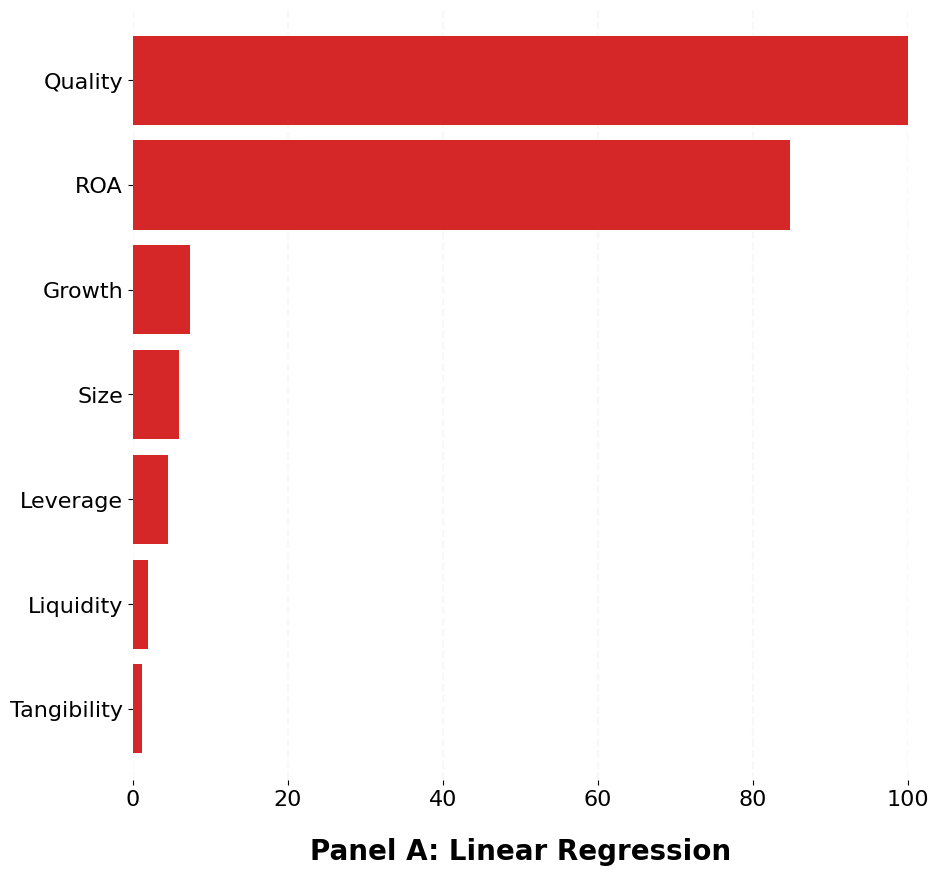

In [199]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#d62728', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel A: Linear Regression", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_PB_LM.png')

In [200]:
from sklearn.linear_model import Lasso

data['Lasso'] = []

model = Lasso(alpha=0.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

print(sum_pred)
print(sum_avg)

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["Lasso"].append(round(r_squared*100, 4))
data["Lasso"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
print(coefficients)
# Get the variable names
variable_names =  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)

0.8428420717877416
0.7677507292316376
R-squared -0.09780693094392134
RMSE 0.006243274605835123
[ 0.0283341  -1.01808342  0.08334333  0.81432782  0.10204731  0.00329319
  0.        ]
      Variable  Coefficient
6    Liquidity         0.00
5  Tangibility         0.32
0     Leverage         2.78
2         Size         8.19
4       Growth        10.02
3          ROA        79.99
1      Quality       100.00


/tmp/ipykernel_54719/1389111664.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


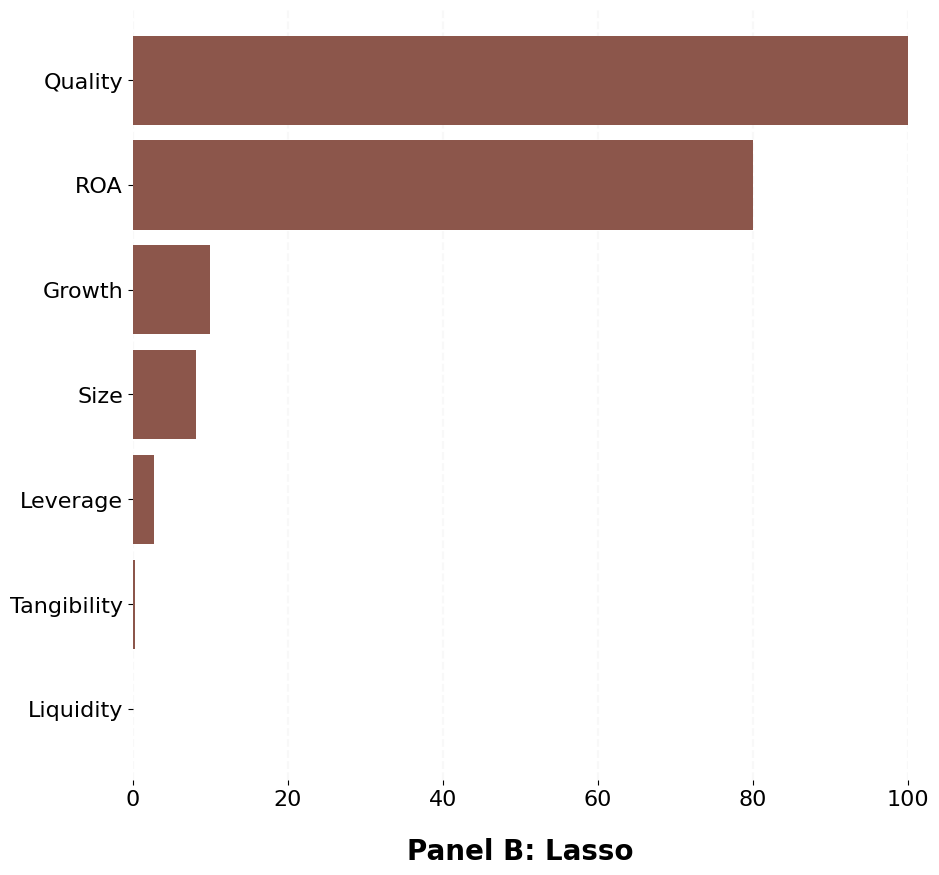

In [201]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#8c564b', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel B: Lasso", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_PB_Lasso.png')

In [202]:
from pygam import LinearGAM

data["GAM"] = []
gam = LinearGAM()
gam.fit(X_train, y_train)
y_pred = gam.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
#  # print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["GAM"].append(round(r_squared*100, 4))
data["GAM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

 # compute variable importance
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']

coefs = gam.coef_


# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefs[0:7]})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared -1.3390736884471308
RMSE 0.013302411333569044
      Variable  Coefficient
2         Size         0.26
3          ROA        12.03
4       Growth        13.64
5  Tangibility        29.63
6    Liquidity        37.55
1      Quality        47.85
0     Leverage       100.00


/tmp/ipykernel_54719/3095313569.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


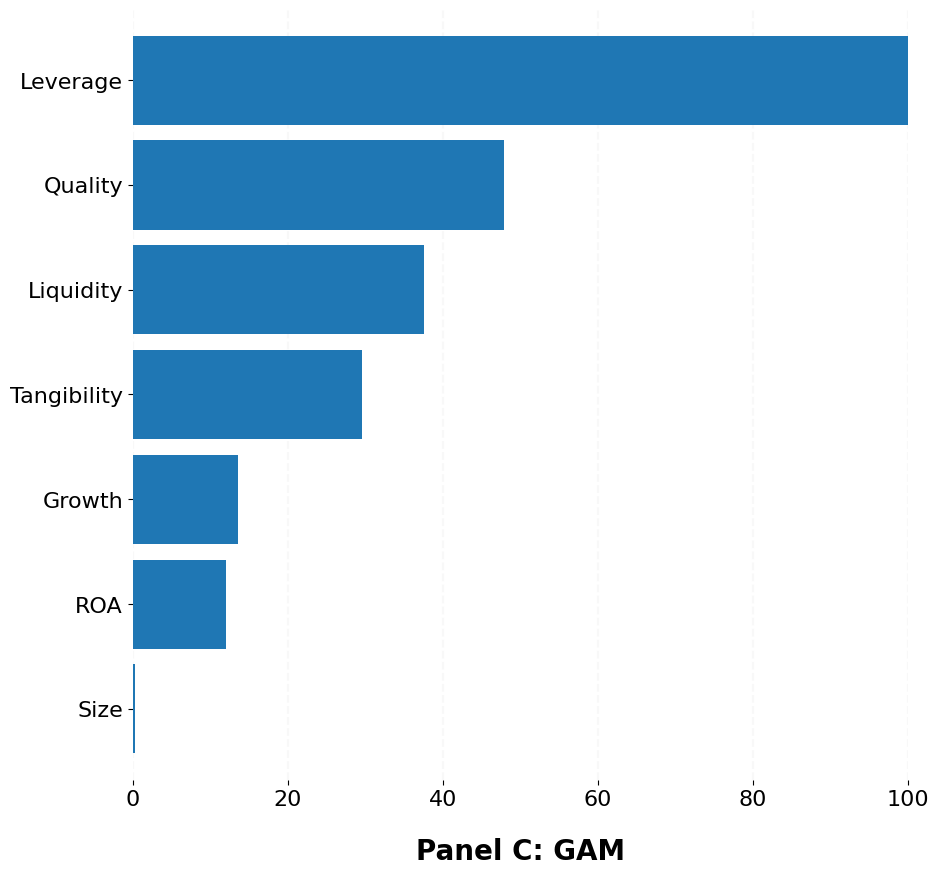

In [203]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#1f77b4', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel C: GAM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_PB_GAM.png')

In [204]:
from sklearn.ensemble import RandomForestRegressor

data["RF"] = []
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["RF"].append(round(r_squared*100, 4))
data["RF"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)


R-squared 0.018400392062670856
RMSE 0.00558239862820277
      Variable  Coefficient
5  Tangibility        14.66
6    Liquidity        15.71
4       Growth        19.10
1      Quality        35.13
3          ROA        59.46
2         Size        84.13
0     Leverage       100.00


/tmp/ipykernel_54719/2257160338.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


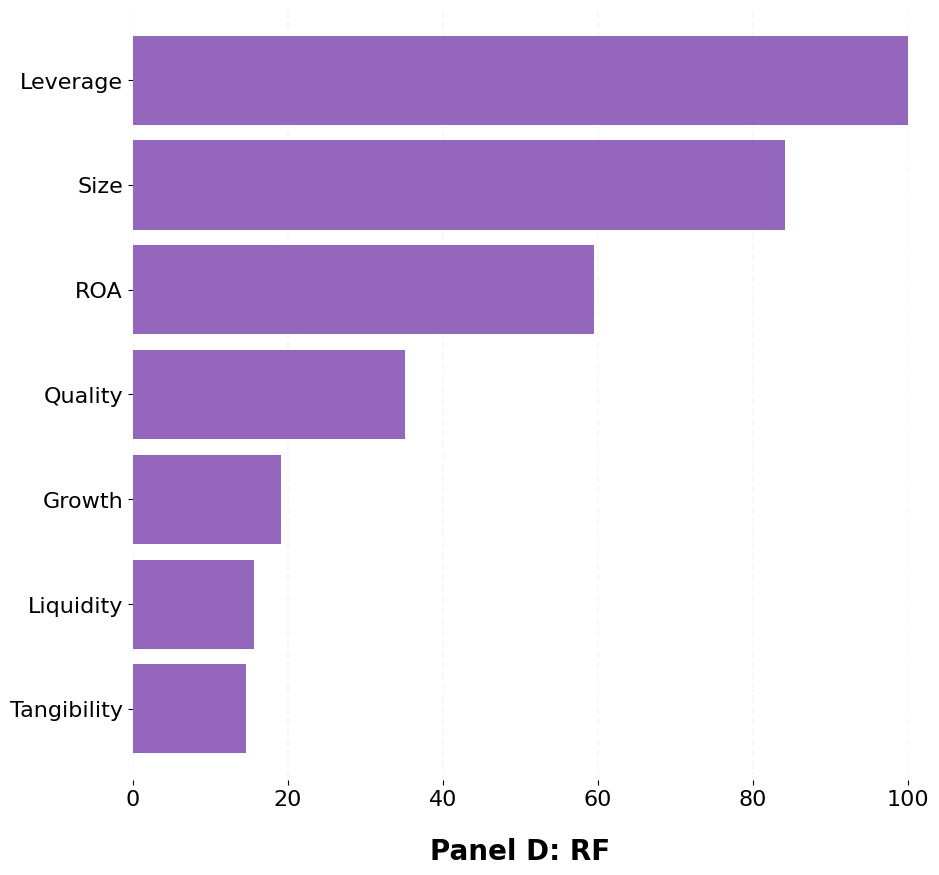

In [205]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#9467bd', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel D: RF", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_PB_RF.png')

In [206]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

data["GBM"] = []
sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
 # print('Coefficients:', model.coef_)
data["GBM"].append(round(r_squared*100, 4))
data["GBM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared 0.039218408656279236
RMSE 0.0054640056843442576
      Variable  Coefficient
5  Tangibility         9.89
6    Liquidity        11.62
4       Growth        18.83
3          ROA        83.33
0     Leverage        84.25
2         Size        98.64
1      Quality       100.00


/tmp/ipykernel_54719/1333772069.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


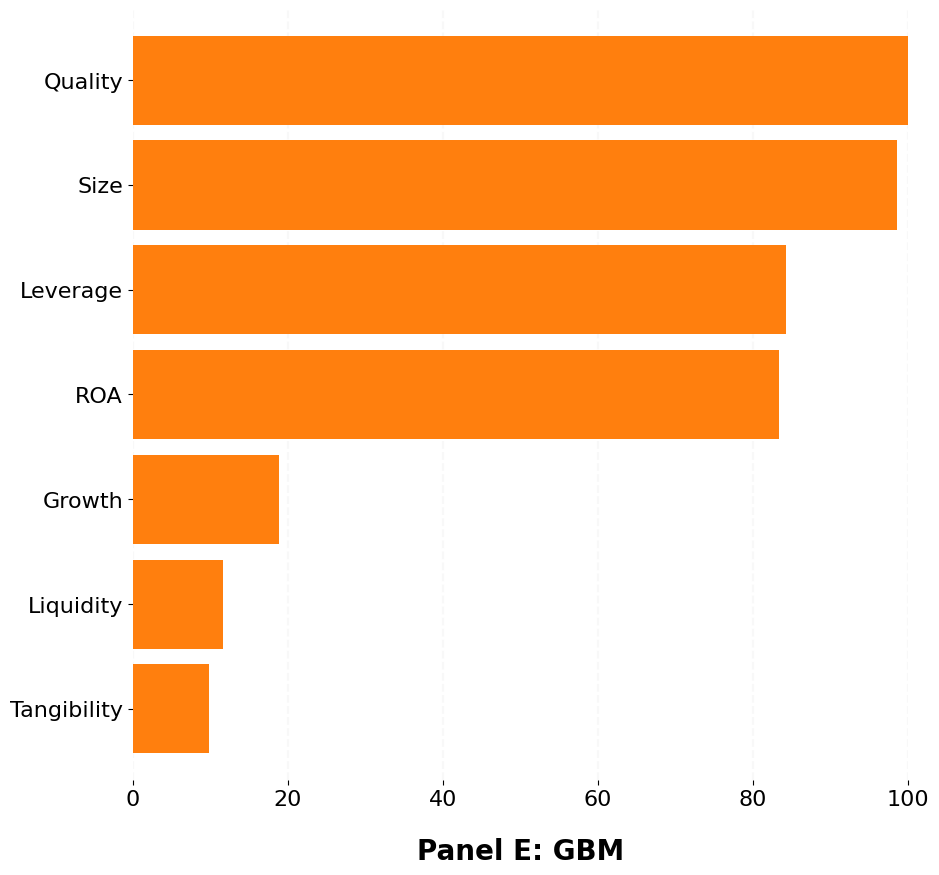

In [207]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#ff7f0e', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel E: GBM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_PB_GBM.png')

In [208]:
from sklearn.neural_network import MLPRegressor

data["NNET"] = []
importances_over_time = []

model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

importances = abs(model.coefs_[0]).sum(axis=1)
importances = importances / max(importances) * 100
# importances_over_time.append(importances.round(4))

# print the model coefficients
data["NNET"].append(round(r_squared*100, 4))
data["NNET"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)


importances = abs(model.coefs_[0]).sum(axis=1)

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# print(importances_over_time)

R-squared -0.32350030828362564
RMSE 0.007526802420911487


/home/notta/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/tmp/ipykernel_54719/1895552787.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


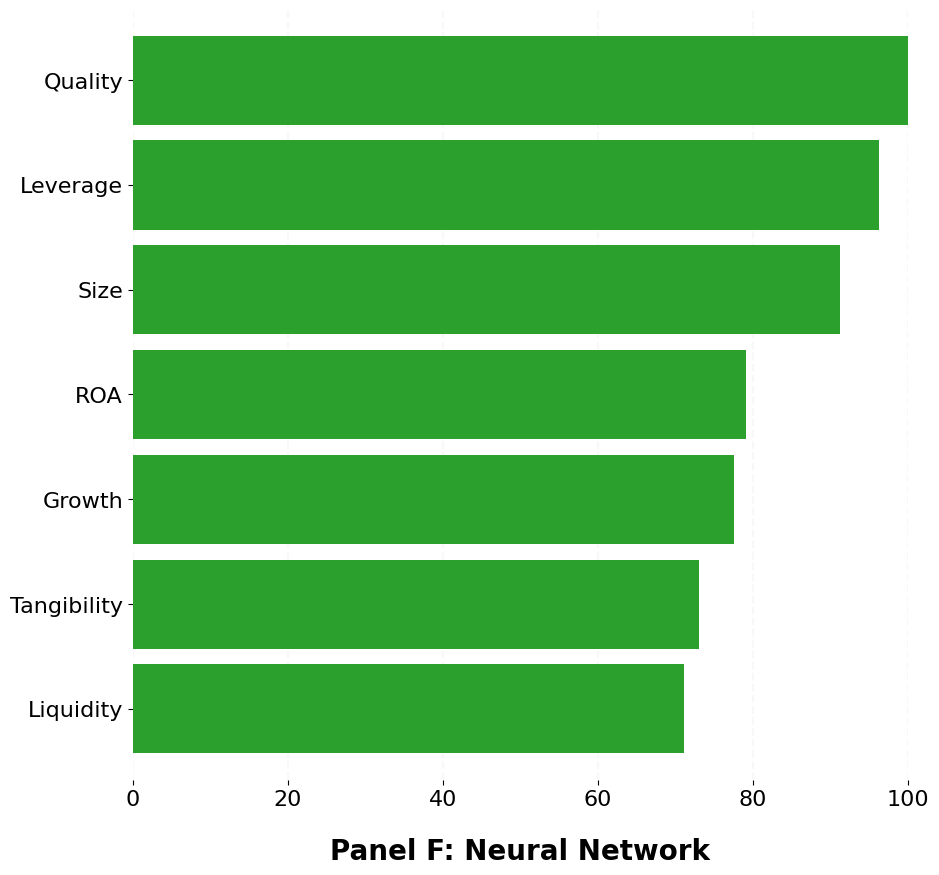

In [209]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#2ca02c', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel F: Neural Network", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_PB_NNET.png')

In [210]:
data

{'LM': [-20.1199, 0.0068313],
 'Lasso': [-9.7807, 0.0062433],
 'GAM': [-133.9074, 0.0133024],
 'RF': [1.84, 0.0055824],
 'GBM': [3.9218, 0.005464],
 'NNET': [-32.35, 0.0075268]}